# Zach Sherman's code to generate RADAR data plots

In [6]:
import glob

from matplotlib import pyplot as plt
from matplotlib import animation
import numpy as np
import pyart # added import

files = sorted(glob.glob('/Users/nivarazin/Local/NAISE/OneDrive_2_7-15-2021/*.nc'))

# Creating a gif of all volumes between user chosen dates.
def animate_ref(nframe):
    plt.clf()
    
    radar = pyart.io.read(files[nframe])
    
#     # added filter
#     gatefilter = pyart.correct.GateFilter(radar)
#     gatefilter.exclude_below('reflectivity', 15)
    
    display = pyart.graph.RadarDisplay(radar)
    # Delete radar after use to save memory.
    del radar
    #tmp fix, for flipping file that is reversed.
    if nframe == 1: 
        reverse_xaxis = True # probably don't need this for LIDAR data
    else:
        reverse_xaxis = False # probably don't need this for LIDAR data
    display.plot_rhi('reflectivity', reverse_xaxis=reverse_xaxis)# , gatefilter=gatefilter) #added filter
    #plt.ylim(0, 25) # zoom in
fig = plt.figure(figsize=(24, 12))
anim_klot = animation.FuncAnimation(fig, animate_ref,
                                    frames=len(files))
anim_klot.save('/Users/nivarazin/Local/NAISE/mpl_data_animation.gif', 
               writer='pillow', fps=1)
plt.close()



# # Creating a gif of all volumes between user chosen dates.
# def animate_diff_ref(nframe):
#     plt.clf()
#     radar = pyart.io.read(files[nframe])
#     display = pyart.graph.RadarDisplay(radar)
#     # Delete radar after use to save memory.
#     del radar
#     #tmp fix, for flipping file that is reversed.
#     if nframe == 1:
#         reverse_xaxis = True
#     else:
#         reverse_xaxis = False
#     display.plot_rhi('differential_reflectivity', reverse_xaxis=reverse_xaxis)
#     #plt.ylim(0, 25)
# fig = plt.figure(figsize=(24, 12))
# anim_klot = animation.FuncAnimation(fig, animate_diff_ref,
#                                     frames=len(files))
# anim_klot.save('/Users/nivarazin/Desktop/NAISE/diff_ref_uncropped_animation.gif',
#                writer='pillow', fps=1)
# plt.close()


# # Creating a gif of all volumes between user chosen dates.
# def animate_vel(nframe):
#     plt.clf()
#     radar = pyart.io.read(files[nframe])
#     display = pyart.graph.RadarDisplay(radar)
#     # Delete radar after use to save memory.
#     del radar
#     #tmp fix, for flipping file that is reversed.
#     if nframe == 1:
#         reverse_xaxis = True
#     else:
#         reverse_xaxis = False
#     display.plot_rhi('mean_doppler_velocity', reverse_xaxis=reverse_xaxis)
#     #plt.ylim(0, 25)
# fig = plt.figure(figsize=(24, 12))
# anim_klot = animation.FuncAnimation(fig, animate_vel,
#                                     frames=len(files))
# anim_klot.save('/Users/nivarazin/Desktop/NAISE/vel__uncropped_animation.gif',
#                writer='pillow', fps=1)
# plt.close()


/Users/nivarazin/opt/anaconda3/envs/pyart_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


IndexError: list index out of range

<Figure size 1728x864 with 0 Axes>

# Generate Individual .PNGs of RADAR data

### For automated cropping of .pngs

In [13]:
def crop_center(im_name):
    im = Image.open(im_name)
    
    # Setting the points for cropped image
    left = 217
    top = 105
    right = 1287
    bottom = 755
    
    return im.crop((left, top, right, bottom))

/Users/nivarazin/opt/anaconda3/envs/pyart_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Generate individual .png's (snapshots from .gifs)

/Users/nivarazin/opt/anaconda3/envs/pyart_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


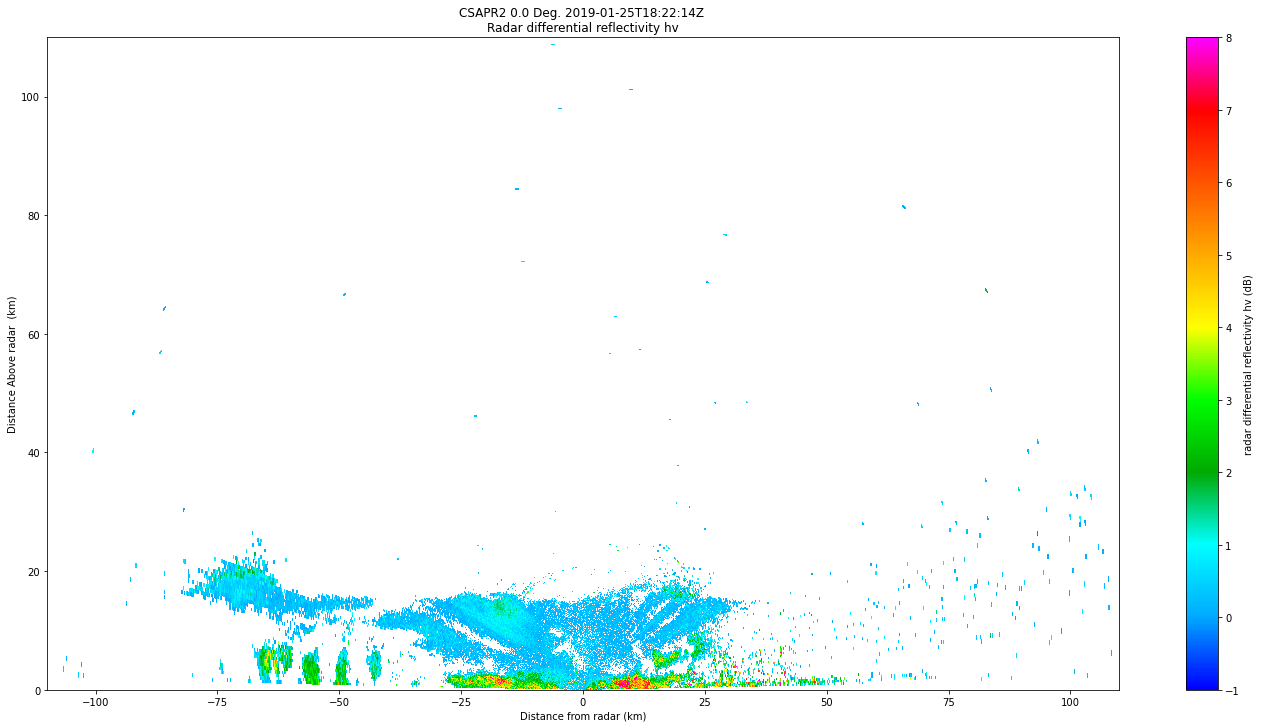

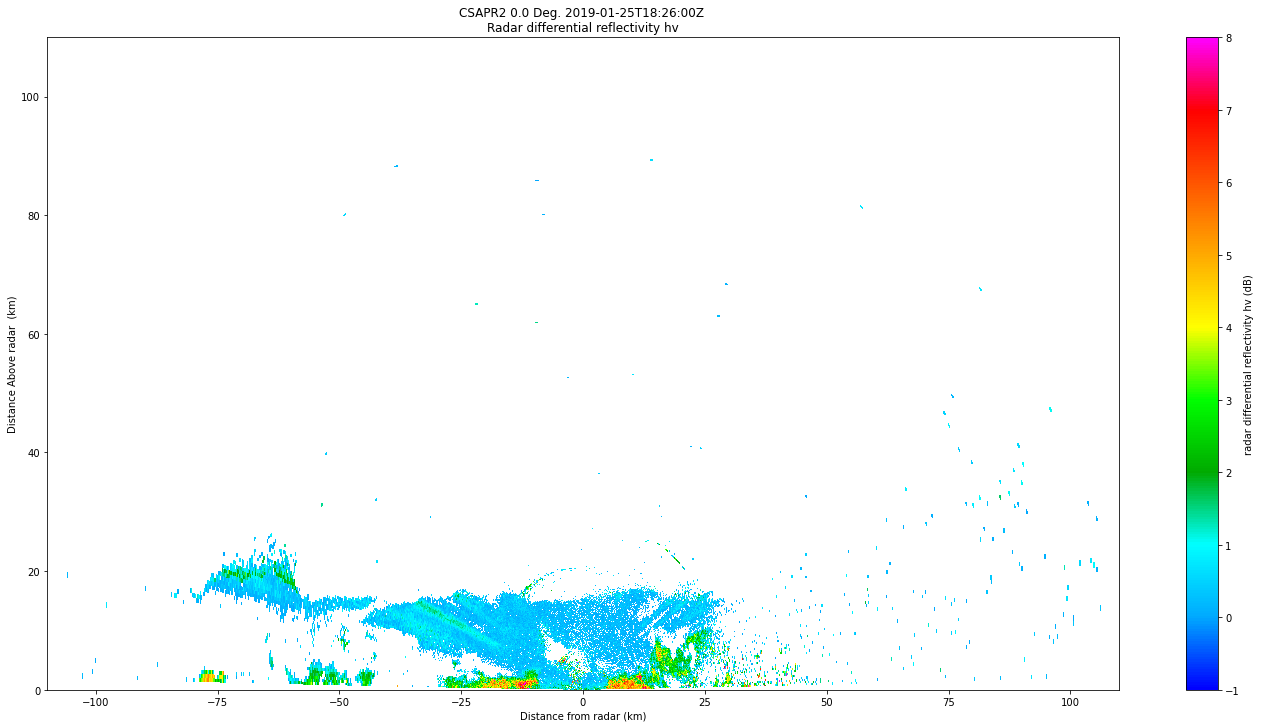

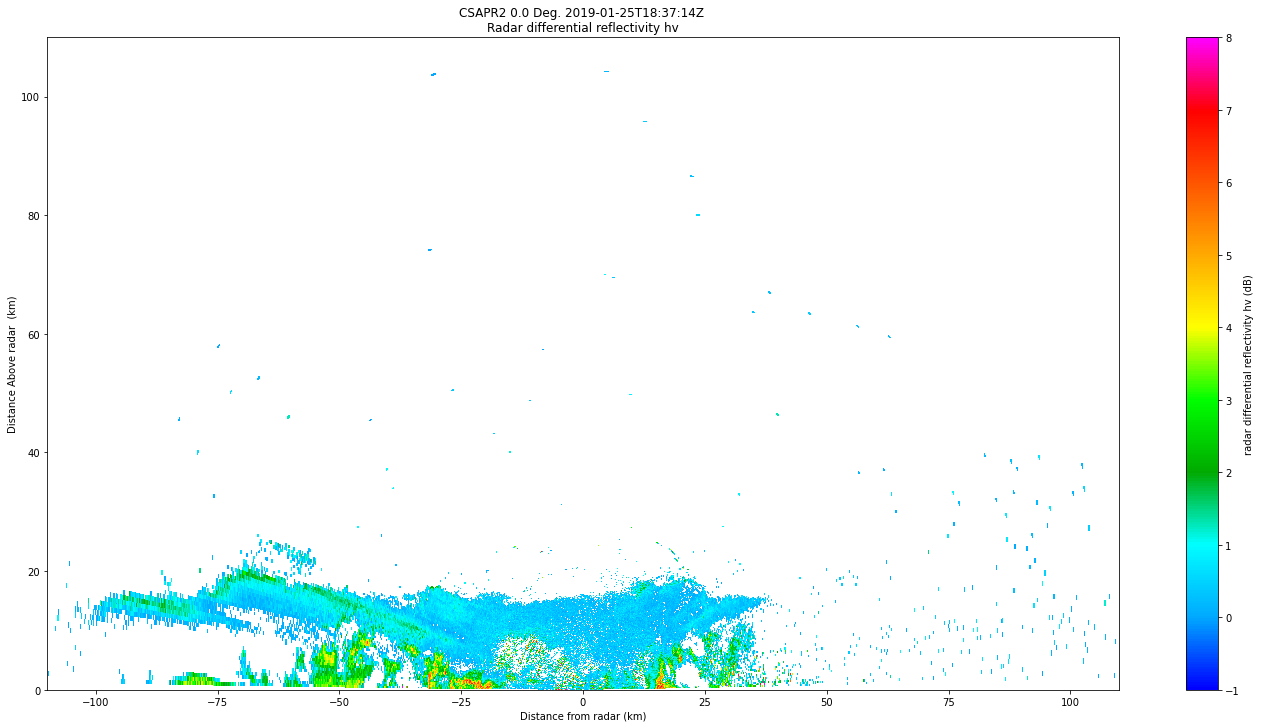

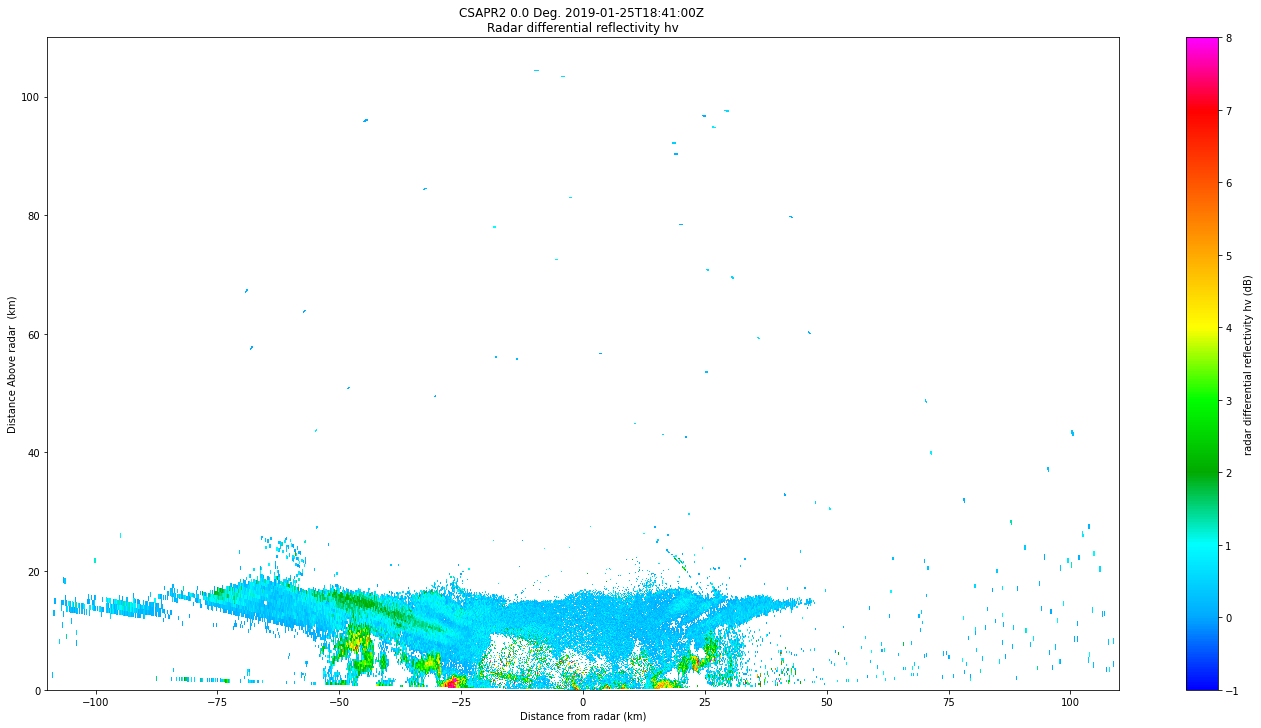

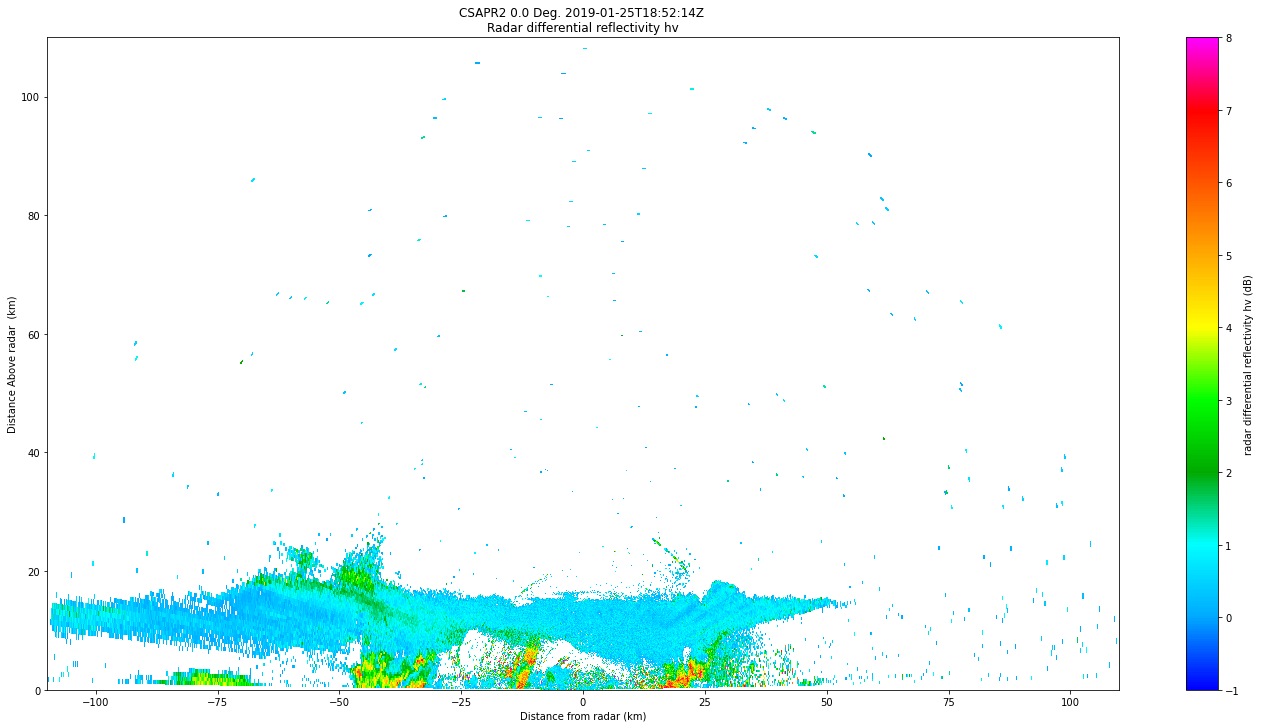

In [18]:
import glob

from matplotlib import pyplot as plt
from matplotlib import animation
from PIL import Image
import numpy as np
import pyart
import imageio

path = '/Users/nivarazin/Local/NAISE/Dense Optical Flow/diff_ref data/filtered_pngs/'
files = sorted(glob.glob('/Users/nivarazin/Local/NAISE/corcsaprrhi/*.nc'))# ['/Users/nivarazin/Local/NAISE/OneDrive_2_7-15-2021/201308241800.nc']#sorted(glob.glob('/Users/nivarazin/Local/NAISE/OneDrive_2_7-15-2021/*.nc'))
    
# Create individual .PNG files
for i in range(len(files)): 
    file = files[i]
    radar = pyart.io.read(file)
    
    # apply gate filter, allowing only reflectivity data from 15 m above sensor through
    gatefilter = pyart.correct.GateFilter(radar)
    gatefilter.exclude_below('differential_reflectivity', 0)
    
    fig = plt.figure(figsize=(24, 12))
    display = pyart.graph.RadarDisplay(radar)
    
    #tmp fix, for flipping file that is reversed.
    if i == 1: 
        reverse_xaxis = True # probably don't need this for LIDAR data
    else:
        reverse_xaxis = False # probably don't need this for LIDAR data
    
    display.plot_rhi('differential_reflectivity', reverse_xaxis=reverse_xaxis, gatefilter= gatefilter)
    
    # for "zooming in" on region in radar scan
    #plt.ylim(0, 25) 
    
    # save plot
    im_name = path + 'diff_ref_' + str(i) + '.png'
    plt.savefig(im_name)

    # crop out legend, plot border, axis labels, etc.
    im_new = crop_center(im_name) # RUN CELL ABOVE
    im_new.save(im_name)
    
    del radar
    
    

# OpenCV Dense Optical Flow Code

### Create .avi File // DONT USE THIS CELL ; USE ONE BELOW FOR .AVI GENERATION

In [ ]:
# import glob
# import cv2 as cv

# frameSize = (1728, 864)

# # Create .avi (movie) file from .png's for optical flow code
# out = cv.VideoWriter('ref_cropped_filtered_25_unzoomed_output_video.avi',cv.VideoWriter_fourcc(*'DIVX'), 1, frameSize)

# for filename in glob.glob('/Users/nivarazin/Desktop/NAISE/Users/nivarazin/Desktop/NAISE/ref cropped filtered 25 unzoomed/*.png'): 
#     img = cv.imread(filename)
#     # cv.imshow(img)
#     out.write(img)

# out.release()

### Generate dense optical flow image

In [20]:
import numpy as np
import cv2 as cv


image_foder = '/Users/nivarazin/Local/NAISE/Dense Optical Flow/diff_ref data/filtered_pngs/'
# Read in .avi file
cap = cv.VideoCapture(cv.samples.findFile(image_foder+"filtered_0_unzoomed.avi"))
ret, frame1 = cap.read()

print(ret)

prvs = cv.cvtColor(frame1,cv.COLOR_BGR2GRAY)
hsv = np.zeros_like(frame1)
hsv[...,1] = 255

ret, frame2 = cap.read() # added here
  
counter=0
while(ret): #changed from while(1)
    print(ret)
    # ret, frame2 = cap.read() #removed here
    next = cv.cvtColor(frame2,cv.COLOR_BGR2GRAY)
    
    flow = cv.calcOpticalFlowFarneback(prvs,next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    mag, ang = cv.cartToPolar(flow[...,0], flow[...,1])
    hsv[...,0] = ang*180/np.pi/2
    hsv[...,2] = cv.normalize(mag,None,0,255,cv.NORM_MINMAX)
    bgr = cv.cvtColor(hsv,cv.COLOR_HSV2BGR)
    cv.imshow('frame2',bgr)
    
    # added for .gif generation: (still images)
    temp = image_folder + 'dense_filtered_25_ref_zoomed_' + str(counter) + '.png'
    #temp = 'LK_diff_ref_cropped_output_opticalhsv_.png'
    cv.imwrite(temp, bgr) # added
    counter += 1
    
    
    
    # I don't know what the code below did; I commented it out (k always = 255)
    
    #k = cv.waitKey(30) & 0xff # print(cv.waitKey(30))    
    #if k == 27:
    #    break
    #elif k == ord('s'):
    
    #cv.imwrite('opticalfb.png',frame2)
    cv.imwrite('dense_filtered_0_unzoomed.png',bgr)
    
    prvs = next
    
    ret, frame2 = cap.read() # added here
 

/Users/nivarazin/opt/anaconda3/envs/pyart_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


True
True
True
True
True


# OpenCV Lucas-Kanade Optical Flow Code

### Convert RADAR data .pngs to .mp4/.avi (USE THIS CELL)

In [19]:
import cv2
import os

image_folder = '/Users/nivarazin/Local/NAISE/Dense Optical Flow/diff_ref data/filtered_pngs/'
video_name = image_folder+'filtered_0_unzoomed.avi'

images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
frame = cv2.imread(os.path.join(image_folder, images[0]))
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))
cv2.destroyAllWindows()
video.release()

/Users/nivarazin/opt/anaconda3/envs/pyart_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### LK algo

In [17]:
import numpy as np
import cv2 as cv
import argparse

# parser = argparse.ArgumentParser(description='This sample demonstrates Lucas-Kanade Optical Flow calculation. \
#                                               The example file can be downloaded from: \
#                                               https://www.bogotobogo.com/python/OpenCV_Python/images/mean_shift_tracking/slow_traffic_small.mp4')


# parser.add_argument('image', type=str, help='path to image file')
# args = parser.parse_args()

image_folder = '/Users/nivarazin/Local/NAISE/temp LK unfiltered cropped/unzoomed/'
video_name = '/Users/nivarazin/Local/NAISE/temp LK unfiltered cropped/unfiltered_cropped_unzoomed.avi'

# cap = cv.VideoCapture(args.image) 
cap = cv.VideoCapture(cv.samples.findFile(video_name))

# params for ShiTomasi corner detection
feature_params = dict( maxCorners = 15,
                       qualityLevel = 0.4,
                       minDistance = 2,
                       blockSize = 7 )
# Parameters for lucas kanade optical flow
lk_params = dict( winSize  = (15,15),
                  maxLevel = 2,
                  criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, 10, 0.03))


# Create some random colors
color = np.random.randint(0,255,(100,3)) #255-->200

# Take first frame and find corners in it
ret, old_frame = cap.read()

old_gray = cv.cvtColor(old_frame, cv.COLOR_BGR2GRAY)
# print(cv.COLOR_BGR2GRAY, type(cv.COLOR_BGR2GRAY))
# print(type(old_gray))

# mask bounds
# range_start = 0 # added
# range_end = 350 # added
# range_id = str(range_start) + '_' + str(range_end)


# Preparing mask --> [range_start:range_end]
p0 = cv.goodFeaturesToTrack(old_gray, mask = None, **feature_params) # default, no mask
#p0 = cv.goodFeaturesToTrack(cv.cvtColor(old_frame[range_start:range_end], cv.COLOR_BGR2GRAY), mask = cv.cvtColor(old_frame[range_start:range_end], cv.COLOR_BGR2GRAY), **feature_params)


# Create a mask image for drawing purposes
mask = np.zeros_like(old_frame)
counter = 0

ret,frame = cap.read() # added
while(ret): # changed condition form 1 --> ret
    print(counter)
    # ret,frame = cap.read() # removed
    print(ret) # ret is boolean that says if image was read correctly
    frame_gray = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    
    # Calculate optical flow
    p1, st, err = cv.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
    
    # Select good points
    if p1 is not None:
        good_new = p1[st==1]
        good_old = p0[st==1]
   
    # draw the tracks
    for i,(new,old) in enumerate(zip(good_new, good_old)):
        a,b = new.ravel()
        c,d = old.ravel()
        mask = cv.line(mask, (int(a),int(b)),(int(c),int(d)), color[i].tolist(), 2) #[255,0,0] OR color[i].tolist()
        frame = cv.circle(frame,(int(a),int(b)),5,color[i].tolist(),-1)
    
    # applying mask
    img = cv.add(frame, mask)
    
#   cv.imshow('frame',img)

    temp = image_folder + str(counter) + '.png' # + range_id
    cv.imwrite(temp, img) # added
    counter += 1
    
#     k = cv.waitKey(1000) & 0xff
#     if k == 27:
#         break
        
    # Now update the previous frame and previous points
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1,1,2)
    
    ret,frame = cap.read() # added


/Users/nivarazin/opt/anaconda3/envs/pyart_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0
True
1
True
2
True
3
True


# Make .GIF from .pngs

In [21]:
#!pip install imageio
import imageio
#range_id = '0_650'
images = []
base_png = '/Users/nivarazin/Local/NAISE/temp LK unfiltered cropped/zoomed/base pngs/ref_0.png'
#temp = ''/Users/nivarazin/Local/NAISE/LK filtered gifs/LK_filtered_ref_cropped_output_opticalhsv_' 
    #  '/Users/nivarazin/Local/NAISE/LK filtered gifs/LK_filtered_ref_cropped_output_opticalhsv_0_1000_vid_0.png'
path = '/Users/nivarazin/Local/NAISE/Dense Optical Flow/diff_ref data/filtered_pngs/'
F0 = path+'dense_filtered_0_ref_zoomed_0.png'
F1 = path+'dense_filtered_0_ref_zoomed_1.png'
F2 = path+'dense_filtered_0_ref_zoomed_2.png'
F3 = path+'dense_filtered_0_ref_zoomed_3.png'
filenames = [
             #base_png, base_png, base_png, base_png, base_png, base_png,
             F0, F0, F0, F0, F0, F0,
             F1, F1, F1, F1, F1, F1,
             F2, F2, F2, F2, F2, F2, 
             F3, F3, F3, F3, F3, F3]
# filenames = [#base_png, # ew bad hard coding
# #              base_png,
# #              base_png,
# #              base_png,
# #              base_png,
# #              base_png,
#              temp + range_id +'_vid_0.png', 
#              temp + range_id +'_vid_0.png',
#              temp + range_id +'_vid_0.png', 
#              temp + range_id +'_vid_0.png',
#              temp + range_id +'_vid_0.png', 
#              temp + range_id +'_vid_0.png',
#              temp + range_id +'_vid_1.png',
#              temp + range_id +'_vid_1.png',
#              temp + range_id +'_vid_1.png',
#              temp + range_id +'_vid_1.png',
#              temp + range_id +'_vid_1.png',
#              temp + range_id +'_vid_1.png',
#              temp + range_id +'_vid_2.png',
#              temp + range_id +'_vid_2.png',
#              temp + range_id +'_vid_2.png',
#              temp + range_id +'_vid_2.png',
#              temp + range_id +'_vid_2.png',
#              temp + range_id +'_vid_2.png',
#              temp + range_id +'_vid_3.png',
#              temp + range_id +'_vid_3.png',
#              temp + range_id +'_vid_3.png',
#              temp + range_id +'_vid_3.png',
#              temp + range_id +'_vid_3.png',
#              temp + range_id +'_vid_3.png']
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(path+'filtered_0_unzoomed.gif', images)
#imageio.mimsave('/Users/nivarazin/Local/NAISE/LK filtered gifs/LK_filtered_filtered_ref_cropped_'+ range_id +'.gif', images)

/Users/nivarazin/opt/anaconda3/envs/pyart_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Dense Pyramid Lucas-Kanade OF (alternate algo)

In [ ]:
!pip install opencv-contrib-python

In [1]:
import cv2
import numpy as np

def dense_optical_flow(method, video_path, params=[], to_gray=False):

    # Read the video and first frame
    cap = cv2.VideoCapture(video_path)
    ret, old_frame = cap.read()

    # crate HSV & make Value a constant
    hsv = np.zeros_like(old_frame)
    hsv[..., 1] = 255

    # Preprocessing for exact method
    if to_gray:
        old_frame = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
    
    counter = 0
    while True:
        # Read the next frame
        ret, new_frame = cap.read()
        frame_copy = new_frame
        if not ret:
            break

        # Preprocessing for exact method
        if to_gray:
            new_frame = cv2.cvtColor(new_frame, cv2.COLOR_BGR2GRAY)

        # Calculate Optical Flow
        flow = method(old_frame, new_frame, None, *params)

        # Encoding: convert the algorithm's output into Polar coordinates
        mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        # Use Hue and Value to encode the Optical Flow
        hsv[..., 0] = ang * 180 / np.pi / 2
        hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

        # Convert HSV image into BGR for demo
        bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
        cv2.imshow("frame", frame_copy)
        cv2.imshow("optical flow", bgr)
        
        temp = save + str(counter) + '.png' # + range_id
        cv2.imwrite(temp, bgr) # added
        counter += 1

        k = cv2.waitKey(25) & 0xFF
        if k == 27:
            break

        # Update the previous frame
        old_frame = new_frame


In [3]:
import cv2

video_path = '/Users/nivarazin/Local/NAISE/ref_cropped_unfiltered_unzoomed_pngs/ref_cropped_unfiltered_unzoomed.avi'
save = '/Users/nivarazin/Local/NAISE/calcOpticalFlowSparseToDense/ref_cropped_unfiltered_unzoomed_'
method = cv2.optflow.calcOpticalFlowSparseToDense
dense_optical_flow(method, video_path, to_gray=True)

# Testing MPL data

In [ ]:
# !pip install mpl2nc
# !pip install act-atmos

In [22]:
import act
from matplotlib import pyplot as plt

try:
    import pyart
    PYART_AVAILABLE = True
except ImportError:
    PYART_AVAILABLE = False

# Read in sample mini-MPL data
files = act.tests.sample_files.EXAMPLE_SIGMA_MPLV5 # act.io.read_sigma_mplv5(path)  
print(files)
path ='/Users/nivarazin/Local/NAISE/OneDrive_2_7-15-2021/201308242000.nc' 
obj = act.io.mpl.read_sigma_mplv5(path)#, save_nc=True, out_nc_path='/Users/nivarazin/Local/NAISE/temp_nc_holder/')

# Create a PyART Radar Object
radar = act.utils.create_pyart_obj(obj, azimuth='azimuth_angle', elevation='elevation_angle',
                                   range_var='range')

# Create Plot Display
if PYART_AVAILABLE:
    display = pyart.graph.RadarDisplay(radar)
    display.plot('nrb_copol', sweep=0, title_flag=False, vmin=0, vmax=1., cmap='jet')
    plt.show()

/Users/nivarazin/opt/anaconda3/envs/pyart_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/nivarazin/opt/anaconda3/envs/pyart_env/lib/python3.8/site-packages/act/tests/data/201509021500.bi


ValueError: did not find a match in any of xarray's currently installed IO backends ['netcdf4', 'scipy']. Consider explicitly selecting one of the installed backends via the ``engine`` parameter to xarray.open_dataset(), or installing additional IO dependencies:
http://xarray.pydata.org/en/stable/getting-started-guide/installing.html
http://xarray.pydata.org/en/stable/user-guide/io.html

In [ ]:
radar = pyart.io.read(path)
    
# added filter   
gatefilter = pyart.correct.GateFilter(radar)
gatefilter.exclude_below('reflectivity', 15)
display = pyart.graph.RadarDisplay(radar)

### Converting .mpl to .nc

In [4]:
!mpl2nc OneDrive_2_7-15-2021 OneDrive_2_7-15-2021

/Users/nivarazin/opt/anaconda3/envs/pyart_env/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


OneDrive_2_7-15-2021/201308241800.mpl
OneDrive_2_7-15-2021/201308241900.mpl
OneDrive_2_7-15-2021/201308242000.mpl
OneDrive_2_7-15-2021/201308242100.mpl
OneDrive_2_7-15-2021/201308242200.mpl
OneDrive_2_7-15-2021/201308242300.mpl
OneDrive_2_7-15-2021/201308250000.mpl
OneDrive_2_7-15-2021/201308250100.mpl
OneDrive_2_7-15-2021/201308250200.mpl
OneDrive_2_7-15-2021/201308250300.mpl
OneDrive_2_7-15-2021/201308250400.mpl
OneDrive_2_7-15-2021/201308250500.mpl
OneDrive_2_7-15-2021/201308250600.mpl
OneDrive_2_7-15-2021/201308250700.mpl
OneDrive_2_7-15-2021/201308250800.mpl
OneDrive_2_7-15-2021/201308250900.mpl
OneDrive_2_7-15-2021/201308251000.mpl
OneDrive_2_7-15-2021/201308251100.mpl
OneDrive_2_7-15-2021/201308251200.mpl
OneDrive_2_7-15-2021/201308251300.mpl
OneDrive_2_7-15-2021/201308251400.mpl
OneDrive_2_7-15-2021/201308251500.mpl
OneDrive_2_7-15-2021/201308251600.mpl
OneDrive_2_7-15-2021/201308251700.mpl
OneDrive_2_7-15-2021/201308251800.mpl
